In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tqdm import tqdm_notebook as tqdm
%matplotlib inline

In [2]:
os.listdir('../../data/')

['mulliken_charges.csv',
 'test.csv',
 'structures.csv',
 'dipole_moments.csv',
 'potential_energy.csv',
 'train.csv',
 'scalar_coupling_contributions.csv',
 'magnetic_shielding_tensors.csv',
 'sample_submission.csv']

In [62]:
mulliken_charge_df = pd.read_csv('../../data/mulliken_charges.csv')
train_df = pd.read_csv('../../data/train.csv')
structure_df = pd.read_csv('../../data/structures.csv')
test_df = pd.read_csv('../../data/test.csv')

In [9]:
mulliken_charge_df.head()

,molecule_name,atom_index,mulliken_charge
0,dsgdb9nsd_000001,0,-0.535689
1,dsgdb9nsd_000001,1,0.133921
2,dsgdb9nsd_000001,2,0.133922
3,dsgdb9nsd_000001,3,0.133923
4,dsgdb9nsd_000001,4,0.133923


In [10]:
train_df.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074


In [7]:
mulliken_charge_df.shape, train_df.shape

((1533537, 3), (4658147, 6))

In [60]:
structure_df['atom'].unique()

array(['C', 'H', 'N', 'O', 'F'], dtype=object)

In [27]:
add = np.zeros((len(train_df),2),dtype=np.float32)
stock = None
molecule_name_atom = None
for i,row in tqdm(train_df.iterrows(),total=len(train_df)):
    if stock != row[1]:
        stock = row[1]
        molecule_name_atom = mulliken_charge_df[mulliken_charge_df['molecule_name']==stock].values
    add[i,0] = molecule_name_atom[np.where(molecule_name_atom[:,1]==row[2])[0],2]
    add[i,1] = molecule_name_atom[np.where(molecule_name_atom[:,1]==row[3])[0],2]

In [47]:
diff = np.abs(add[:,0]-add[:,1])

In [57]:
pd.to_pickle(add, '../mulliken_charge.pkl')

In [65]:
pd.to_pickle(diff, '../mulliken_charge_diff.pkl')

In [68]:
pd.to_pickle(mul, '../mulliken_charge_mul.pkl')

In [58]:
structure_df.head()

,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397


(0, 1)

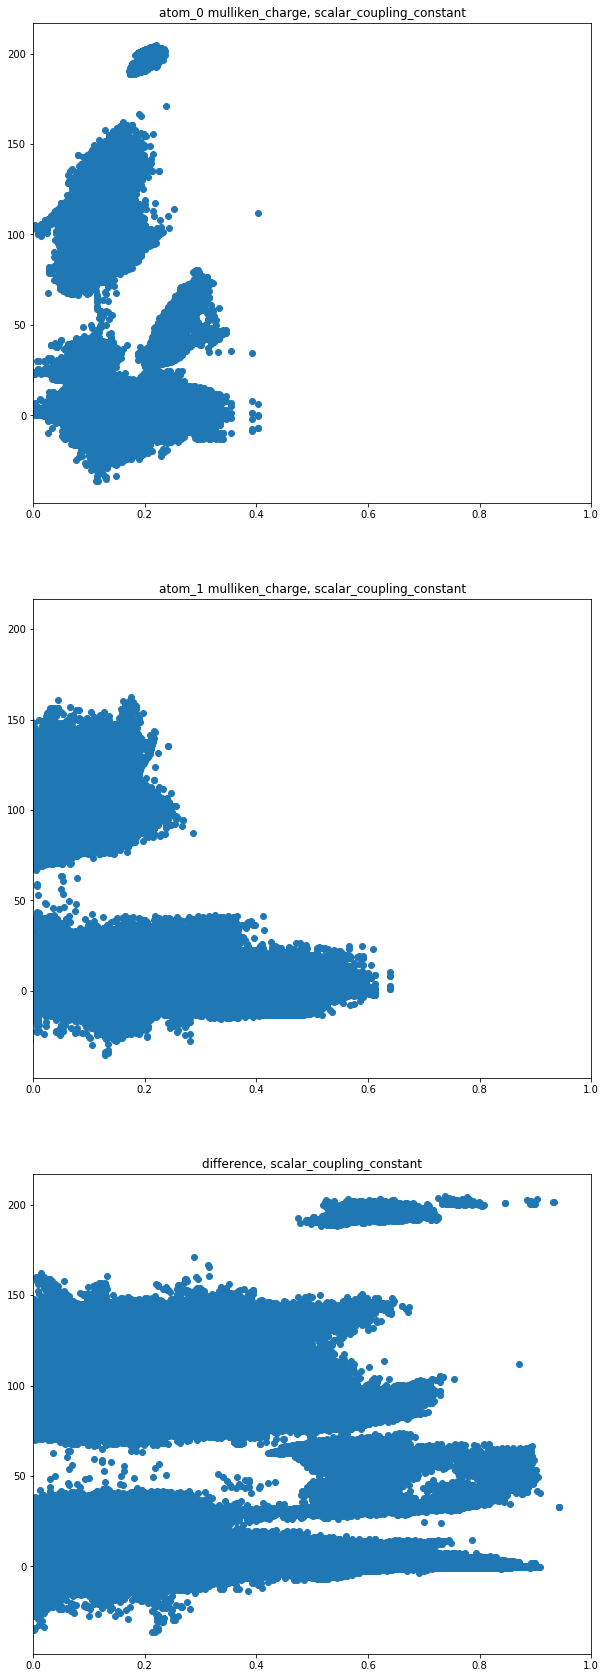

In [55]:
plt.figure(figsize=(10,30))
plt.subplot(4,1,1)
plt.scatter(add[:,0],train_df['scalar_coupling_constant'])
plt.title('atom_0 mulliken_charge, scalar_coupling_constant')
plt.xlim(0,1)
plt.subplot(4,1,2)
plt.scatter(add[:,1],train_df['scalar_coupling_constant'])
plt.title('atom_1 mulliken_charge, scalar_coupling_constant')
plt.xlim(0,1)
plt.subplot(4,1,3)
plt.scatter(diff, train_df['scalar_coupling_constant'].values)
plt.title('difference, scalar_coupling_constant')
plt.xlim(0,1)
plt.subplot(4,1,4)
plt.scatter(mul, train_df['scalar_coupling_constant'])
plt.title('mulltiple, scalar_coupling_constant')
plt.xlim(0,1)

In [63]:
train_df = pd.concat([train_df, pd.DataFrame(add, columns=['mulliken_charge_atom_index_0', 'mulliken_charge_atom_index_1'])],axis=1)

In [64]:
train_df.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,mulliken_charge_atom_index_0,mulliken_charge_atom_index_1
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,0.133921,-0.535689
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,0.133921,0.133922
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,0.133921,0.133923
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,0.133921,0.133923
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,0.133922,-0.535689


In [66]:
mul = add[:,0]*add[:,1]

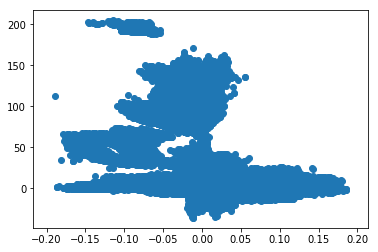

In [67]:
plt.scatter(mul, train_df['scalar_coupling_constant'])